# INFO 2950 Group Project


In [ ]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import PrecisionRecallDisplay


In [ ]:
!pip install sql

In [ ]:
%load_ext sql
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False
%sql duckdb:///:memory:

## Introduction

Airbnb is one of the most influential forces in hospitality and technology, gathering and providing a plethora of data. Airbnb users have access to a wide range of data characteristics that help inform their decision on where to stay. The data posted on rental property listings range from nightly rate, property location, neighborhood, check-in policies, host rating, and host response rate. Most data elements can be characterized into two primary categories: host characteristics or property characteristics.

Our research investigates whether the property or host characteristics are more impactful on an Airbnb listing's reviews. How important is the location of a property? How important are the host ratings for guests? Can a highly-rated host compensate for a lower-quality property? 

Our research concluded that host characteristics impact a listing's review score slightly more than property characteristics. This is based on our data analysis, calculations, visual displays, and modeling. We concluded this was because property characteristics are more subjective than host characteristics which are more essential and straightforward.

## Data description

The data source we used is https://www.kaggle.com/datasets/ivanovskia1/nyc-airbnb-rental-data-october-2017?resource=download. 

Our cleaned data contains 26617 properties and the data was accumulated in New York, NY in October 2017.

This consists of information to find out about hosts, geographical and property characteristic information used to make predictions and draw conclusions. Specifically, the observations in our data are the different Airbnb properties listed in New York City in October 2017 and the attributes are location, longitude, latitude, property type, price, host response time, host response rate, cancellation policy, and review scores rating. These variables will then all be used to answer our research question regarding whether host characteristics or property characteristics impact Airbnb reviews more.  

This data was sourced from a website with Airbnb data known as Inside Airbnb. The Inside Airbnb is a mission-driven project that provides data and advocacy about Airbnb's impact on residential communities. Donations fund the collection and hosting of data, the development of analytic and activist tools, and help sustain the project. Subsequently, the data collected may have been biased towards data that shows Airbnb listings which are entire homes, showing its impact on the housing market. The Airbnb's which disrupt the hotel industry or which are property such as boats were probably less likely to be recorded.

This data was then taken from the Inside Airbnb website and got cleaned and processed into a dataset and then uploaded on kaggle. This is the dataset that was downloaded and used in this project. The people involved in the data were not aware about the study, the data about them was sourced by taking the information off the publicly available Airbnb website and compiling it. 


In [ ]:
airbnb_df = pd.read_csv("cleaned_airbnb_data.csv")
airbnb_df = airbnb_df.drop(columns = ["Unnamed: 0"])
print(airbnb_df.shape)

(26617, 9)


In [ ]:
variable_types = airbnb_df.dtypes
print('Here are the types of each of the variables:')
print(variable_types)

Here are the types of each of the variables:
location                 object
longitude               float64
latitude                float64
property_type            object
price                     int64
host_response_time        int64
host_response_rate      float64
cancellation_policy       int64
review_scores_rating    float64
dtype: object


The descriptions of each of the variables are: 

- location: represents the neighborhood in New York the property is located
- longitude: represents the longitude coordinates of the Airbnb property
- latitude: represents the latitude coordinates of the Airbnb property
- property_type: represents the type of Airbnb being rented for example a house, apartment or boat
- price: represents the nightly rate of the property
- host_response_time: the average time a host takes to respond. 1 represents the host responds in a few days or more, 2 represents the host responds within a day, 3 represents the host responds within a few hours, 4 represents the host responds within an hour
- host_response_rate: the rate a host responds to a booking request. 
- cancellation_policy: the type of cancellation policy the host sets. 1 represents a super strict_60 cancellation policy, 2 represents a super strict 30 one, 3 represents a strict one, 4 represents a moderate one, and 5 represents a flexible one
- review_scores_rating: the Airbnb rating on a scale of 0-100

## Pre-Registration Statement

### Analysis 1: Investigate whether property characteristics, specifically location, longitude, latitude, and price, have an effect on the review score of an airbnb listing. 

In this analysis, we want to determine property characteristics’ impact on the review score of an airbnb listing. We will use four property characteristics from our dataset that we believe can have a potential relationship with the review score: location, latitude, longitude, and price. We will first run a single-input linear regression analysis for each of variable. 

After running a single variable analysis, we ran a multivariate linear regression to see how these variables impact the review score together. By using a multi variable analysis, we get to see the impact of each of the individual variables on the review score, often with holding the other variables constant. The null hypothesis of this is that analysis is that no property characteristic has an impact on the review score of the airbnb listing.

After running these regressions, we will end up with a slope coefficient and a p-value. The slope coefficient will give us insight on the magnitude and direction of the impact on review scores. The p-value we receive from this test will let us be able to determine if we can reject or fail to reject the null hypothesis (that property characteristics do not have an impact on the Airbnb review score).

Whether this impact is significant or not, Airbnb hosts can receive more insight on what is important in how guests rate their property.

### Analysis 2: Investigate the relationship between an airbnb’s host characteristics (e.g. response time) and review score.

Airbnb’s host characteristics potentially affect the review score. In our dataset, there are three variables defining host characteristics: host response time, host response rate, and cancellation policy.

First, we will investigate the relationship between host response time and review score to test if a faster host response would result in a higher review score. We will conduct a seaborn regplot to visualize a scatterplot and regression line for host response time against review score.

Next, we will investigat ethe relationship betweena host_response_rate and review score to test if the frequency of the hosts’ responses would affect the Airbnb’s review score. We will conduct another seaborn regplot to visualize a regression analysis between host response rate and review score.

Additionally, we will investigate the relationship between cancellation policy and review score to test if the strictness in cancellation policies would affect the Airbnb’s review score. We will perform a linear regression analysis between cancellation policy and review score.

Lastly, we will interpret the r square values for the three combinations to analyze which independent variable captures more variation in review scores.

After running three single variable analysis, we will run a multivariate linear regression to see how these variables impact the review score together. By using a multi variable analysis, we get to see the impact of each of the individual variables on the review score. 

We also want to do a hypothesis testing to investigate whether there is a positive relationship between an airbnb's host characteristics and review scores. Our null hypothesis is there is no relationship between an airbnb's host characteristics and review scores ($\rho = 0$). Our alternative hypothesis is there is a positive relationship between an airbnb's host characteristics and review scores ($\rho > 0$). We will perform a t-test for testing. We calculate the test statistic using the following formula: 
$$t = \dfrac{r\sqrt{n-2}}{\sqrt{1-r^2}}$$

Next, we use the resulting test statistic to calculate the P-value. The p-value is determined by referring to a t-distribution with n-2 degrees of freedom. We set our significance level to be $\alpha = 0.05$. If the p-value is smaller than the significance level, we reject the null hypothesis. We conclude that there is sufficient evidence that there is a linear relationship in the population between the host characteristics and review scores. Otherwise, we fail to reject the null hypothesis and conclude there is not sufficient evidence at the level that there is a linear relationship in the population between host characteristics and review scores. 

## Data Analysis

### Summary Statistics

The first step in exploratory data analysis was to calculate summary functions for some of the relevant variables. This includes the standard deviation and mean for numerical values for the property characteristics mainly price and host characteristics mainly response time compared to the review scores.

We will then analyze how review scores also vary to get a general idea of the average review and the standard deviation.

In [ ]:
from statistics import mean, median, mode, stdev

price_mean = airbnb_df['price'].mean()
print('Mean of price: ' + str(price_mean))
price_std = airbnb_df['price'].std()
print('Standard deviation of price: ' + str(price_std))

response_rate_mean = airbnb_df['host_response_rate'].mean()
print('Mean of response: ' + str(response_rate_mean))
response_rate_mean_std = airbnb_df['host_response_rate'].std()
print('Standard deviation of response rate: ' + str(response_rate_mean_std))

review_scores_mean = airbnb_df['review_scores_rating'].mean()
print('Mean of reviews: ' + str(review_scores_mean))
review_scores_std = airbnb_df['review_scores_rating'].std()
print('Standard deviation of reviews: ' + str(review_scores_std ))

Mean of price: 143.8412292895518
Standard deviation of price: 173.79813049951198
Mean of response: 0.9464398692564902
Standard deviation of response rate: 0.14714588069256998
Mean of reviews: 93.6558214674832
Standard deviation of reviews: 7.470023201837723



As for the property characteristics we calculated the average nightly rate for an Airbnb rental was \\$143.84, and that the standard deviation was significantly high at \\$173.80. This indicated that there is drastic variation in the nightly rates of Airbnb rentals. This was to be expected as the minimum nightly rate in our dataset was \\$0 , and the max was \\$10,000. Excluding such outliers the most common low nightly rates were around \\$40 a night and the most common high nightly rates were around \\$400 a night. Despite the outliers this would still be a high standard deviation and therefore there still a relatively large spread in nightly rates.

As for the host characteristics we calculated the mean of host response rate was 94.64% and the standard deviation was significantly low at 0.15. If a host reponds to all guest messages at some point their response rate is 100%, and if they never respond to guests their response rate is 0%. The mean and standard deviataion indicate that almost all hosts responded to guests messages at some point, and having a host not respond to a few guests was extremely rare. 

As for the review scores, the mean was 93.66 and the standard deviation was 7.47. The mean scores are very high as guests tended to enjoy the rentals they stayed at. The standard deviation is very high as well, indicating that there was large fluctuation in property ratings. Despite this variation, it was very rare for ratings to fall below 80%. 

At this stage, while this information is useful, we are interested in finding more data which can further provide better analysis and answer our research question of whether the property or the host is more impactful on property reviews.


### Visual displays

In this section we analyzed our data by using visual displays. We created visual displays which best demonstrate the relationship property characteristics and host characteristics have on rental property review scores.

#### Outliers 
We wanted to first inspect whether there are any outliers in price by visually drawing a boxplot. We need to think about how to deal with outliers with extremely high price that might create a bias for our model. 

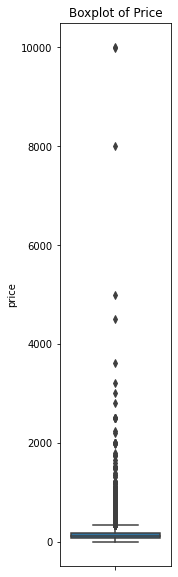

In [ ]:
plt.figure(figsize=(2,10))
sns.boxplot(y ='price', data=airbnb_df)
plt.title('Boxplot of Price')
plt.show()

From the boxplot, we can see that the 25 percentile, 50 percentile, and 75 percentile are all far below 2000. There are some outliers at approximately \\$10000, \\$8000, and \\$2000-\$5000 range. These extremely large numbers do not look representative of our population, and it is possible that the property owners list these price intentionally to prevent booking. Thus, it is worth considering excluding these numbers. If we exclude these numbers, the mean and standard deviation of price will both decrease.

#### Property Characteristics

In order to visualize the impact property characteristcs has on a a guest's desire to rent a property, we decided to analyze the rental price against the review scores.

In [ ]:
airbnb_df.head()

,location,longitude,latitude,property_type,price,host_response_time,host_response_rate,cancellation_policy,review_scores_rating
0,Bronx,-73.786509,40.849191,House,50,4,1.0,4,100.0
1,Bronx,-73.786609,40.849775,Apartment,125,4,1.0,3,95.0
2,Bronx,-73.789328,40.850024,House,69,4,1.0,4,97.0
3,Bronx,-73.789304,40.851980,Apartment,150,4,1.0,5,100.0
4,Bronx,-73.788680,40.852054,House,101,4,1.0,4,100.0


In [ ]:
fig = px.scatter(airbnb_df, x="review_scores_rating", y="price", trendline="ols",color="price")
fig.show()

This visual display demonstrates that mostly when the price is lower, the rating is higher.

In [ ]:
airbnb_df[["price","review_scores_rating"]].corr()

,price,review_scores_rating
price,1.000000,0.022977
review_scores_rating,0.022977,1.000000


Further, this demonstrates that the correlation between price and review is weak.

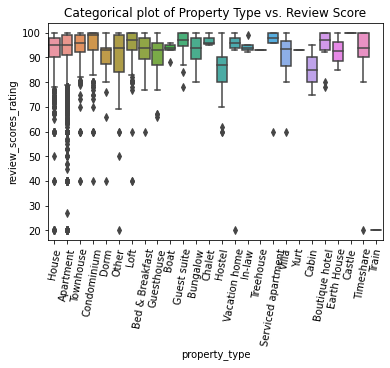

In [ ]:
sns.boxplot(x='property_type', y='review_scores_rating', data=airbnb_df)
plt.title('Categorical plot of Property Type vs. Review Score')
plt.xticks(rotation = 80)
plt.show()

From this boxplot, we can see that there is a relationship between property type and review score. For some property types, such as hostel, dorm, and cabin, the owners tend to receive a lower review rating, whereas apartment, loft, townhouse and etc. tend to have higher review rating. This indicates that there is a strong relationship between not only the type of property and price, but also the type of property and review score.

Next, we are going to run regressions on how the latitude and longitude (the location) impacts the review score of the airbnb. We are going to do this by first visualizing the latitude and longitude for each location using a heat map. 

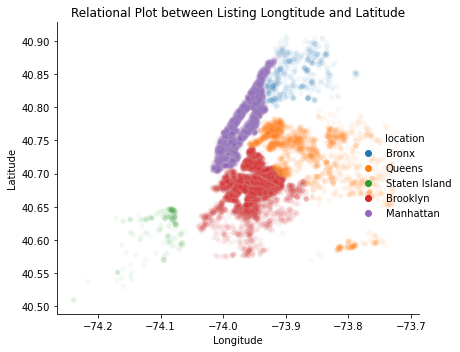

In [ ]:
sns.relplot(x='longitude',y="latitude",hue="location",s=30,data=airbnb_df,alpha=0.05)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Relational Plot between Listing Longtitude and Latitude')
plt.tight_layout()
plt.show()

We are then going to establish a center of the Airbnb listings so we can come up with an analysis of how distance from the center impacts review scores.

Center: [[-73.98022822  40.73618615]]


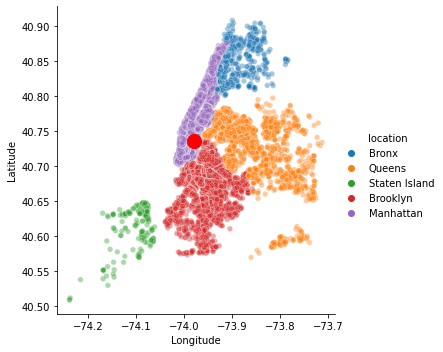

In [ ]:
price99 = airbnb_df['price'].quantile(.99)
ls_highprice = airbnb_df[airbnb_df['price']>price99]
ls_highprice = pd.DataFrame({'longitude': ls_highprice['longitude'],'latitude': ls_highprice['latitude']})
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=1) 
kmeans.fit(ls_highprice)                
y_kmeans = kmeans.predict(ls_highprice)
center = kmeans.cluster_centers_ # get the centroid of each cluster
sns.relplot(x='longitude',y="latitude",hue="location",s=30,data=airbnb_df,alpha=0.4)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(center[:,0], center[:, 1], c='red', s=200)
print('Center:', center)

In [ ]:
center_longitude = center[0][0]
center_latitude = center[0][1]
airbnb_df['distance_to_center'] = ((airbnb_df['longitude']-center_longitude)**2+(airbnb_df['latitude']-center_latitude)**2)**(1/2)

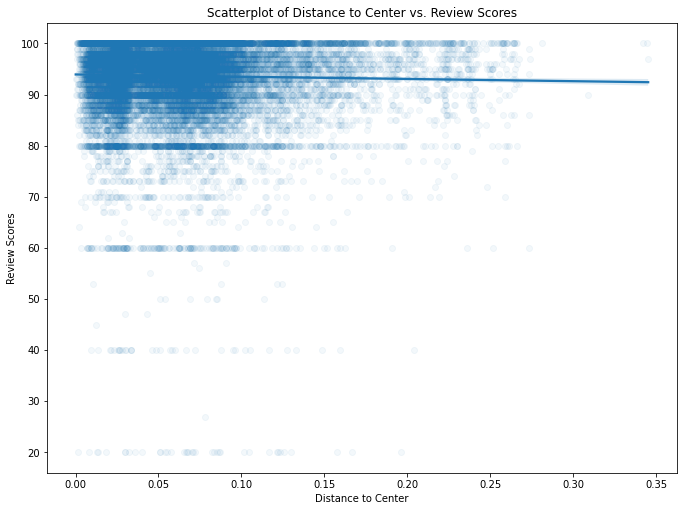

r^2 score of the distance model: 0.001


In [ ]:
plt.figure(figsize=(9.6, 7.2))
sns.regplot(x = 'distance_to_center', y='review_scores_rating',data=airbnb_df,scatter_kws={'alpha':0.05})
plt.title('Scatterplot of Distance to Center vs. Review Scores')
plt.xlabel('Distance to Center')
plt.ylabel('Review Scores')
plt.tight_layout()
plt.show()
distance_model = LinearRegression().fit(airbnb_df[['distance_to_center']], airbnb_df['review_scores_rating'])
distance_score = distance_model.score(airbnb_df[['distance_to_center']], airbnb_df['review_scores_rating'])
print('r^2 score of the distance model: {:.3f}'.format(distance_score))

This shows that there is no significant relationship between location of a property and its review scores.

#### Host Characteristics

In order to visualize the impact host characteristics have on a guest's desire to rent a property, we decided to analyze the impact the host response rate has with the review scores.

In [ ]:
fig = px.scatter(airbnb_df, x="review_scores_rating", y="host_response_rate", trendline="ols",color="host_response_rate")
fig.show()

Through this display, we can see as the response rate is close to 1 (100% response rate) we will find most of the rating as 100 or above 70. 

## Evaluation Of Significance

### Analysis 1: The relationship between property characteristics and review score

Our first analysis examines the relationship between property characteristics and review score of airbnb properties. We previously defined property characteristics as property type, longitude and latitude (location) and price of the airbnb.

We are going to run a regression to test if there is any significant relationship between the price of a property and its review score. We are doing this by creating a function to run a regression on the variables and print its coefficient, intercept and RMSE.

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error 
def run_regression(x,train,test,y):
    reg = LinearRegression().fit(train[x],train[y])
    train_predict=reg.predict(train[x])
    test_predict=reg.predict(test[x])
    mse1 = mean_squared_error(train_predict,train[y])
    mse2 = mean_squared_error(test_predict,test[y])
    ## add what each variable means in the print
    print(x)        
    print(reg.coef_)
    print(reg.intercept_)
    print(np.sqrt(mse1))
    print(np.sqrt(mse2))

Then we are splitting the data into both test and train data so we can run regressions on the individual property characteristic variables on the review score to see how a change in the property characteristic impacts the review score.

In [ ]:
airbnb_train, airbnb_test = train_test_split(airbnb_df, test_size=0.1,random_state=2950)

['price']
[-0.00201906]
93.94612740666871
7.482622703815382
7.486564005707093


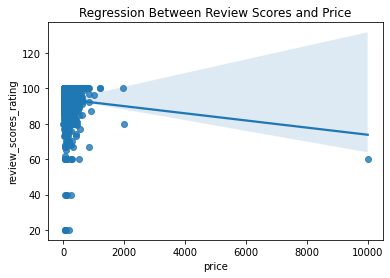

In [ ]:
for x in np.array(['price']):
    run_regression([x],airbnb_test,airbnb_train,'review_scores_rating')
sns.regplot(data=airbnb_test, x='price', y='review_scores_rating')
plt.title('Regression Between Review Scores and Price')
plt.show()

In this, we see that increasing the price of an airbnb tends to have a negative impact on the review score of the airbnb. Specifically, a one dollar increase in price corresponds to a -0.002 unit decrease in the review score of an airbnb. When the price is 0, the review score of an airbnb is 93.95 and the mean squared error is 7.5.

Then we are splitting the data into both test and train data so we can run regressions on the individual property characteristic variables on the review score to see how a change in the property characteristic impacts the review score.

In [ ]:
airbnb_train, airbnb_test = train_test_split(airbnb_df, test_size=0.1,random_state=2950)

In [ ]:
for x in np.array(['latitude','longitude','price',]):
    run_regression([x],airbnb_test,airbnb_train,'review_scores_rating')

['latitude']
[-7.78350153]
410.67954316089254
7.484714940655063
7.4689164505181305
['longitude']
[-3.59004468]
-171.8355979561986
7.494686145129091
7.463325358453201
['price']
[-0.00201906]
93.94612740666871
7.482622703815382
7.486564005707093


So far we see that the latitude has a positive relationship with the review score of the airbnb. This means that if we increase in latitude (go further north) the review scores of the airbnb are higher. 

However, for longitude, there is a negative relationship between longitude and price. When we increase in longitude, there is decrease in 157.99 units of the review score. 

Lastly, for price, increasing the price of an airbnb tends to have a negative impact on the review score of the airbnb. 

In [ ]:
run_regression(['latitude','longitude','price'],airbnb_train,airbnb_test,'review_scores_rating')

['latitude', 'longitude', 'price']
[-3.13990692e+00 -4.18629892e+00  1.40783646e-03]
-88.24776244348325
7.4575957961322255
7.514175928146083


Having a multivariate regression with all of the property characteristics, we are able to see that latitude and longitude have a very small negative impact on the review score of the airbnb. However, the price has a small positive impact on the review score of an airbnb which is different when we did the single variable regression where it had a positive impact. 

### Analysis 2: The relationship between host characteristics and review score

Our second analysis examines the relationship between host characteristics and review score of airbnb properties. We previously defined host characteristics as host response time, host response rate and cancellation policy. 

**Explanation for cell below:** First, we are interested in the impact of individual host characteristic on the review score. We run a linear regression and generate a regression plot for host response time variable. The regression line in the plot is almost horizontaly, which shows there is an extremely low correlation between host response time and review scores.

Firstly, we want to visualize how property type impacts review scores. We will do this by finding the median review score for each property type and then analyzing the deviation around each property type. 

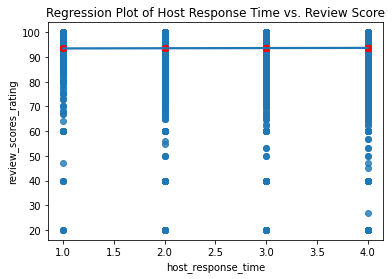

In [ ]:
response_time_model = LinearRegression().fit(airbnb_df[['host_response_time']], airbnb_df['review_scores_rating'])
sns.regplot(x=airbnb_df["host_response_time"], y=airbnb_df["review_scores_rating"])
plt.scatter(airbnb_df['host_response_time'], response_time_model.predict(airbnb_df[["host_response_time"]]), c='red')
plt.title('Regression Plot of Host Response Time vs. Review Score')
plt.show()

**Explanation for cell below:** The model shows a slightly positive relationship between host response time and the review score of an airbnb listing. Specifically, we expect that each one unit increase in host response time corresponds to a 0.072 increase in the review score. This model indicates that when the host response time is 1, which represents "a few days or more," we expect the review score of the property to be 93.418 (coefficient+intercept). We see many outliers that give low review score ratings. The sign of the slope matches our expectation, because we expect faster response rate would lead to higher review score. The $r^2$ of the linear regression model for response time against review score is 0.000, which can be interpreted as 0% of the variation in the output variable can be explained  by the input variable host response time. 

In [ ]:
response_time_score = response_time_model.score(airbnb_df[['host_response_time']], airbnb_df['review_scores_rating'])
print('host response time coefficient: {:.3f}'.format(float(response_time_model.coef_)))
print('host response time intercept: {:.3f}'.format(response_time_model.intercept_))
print('r^2 score of the response time model: {:.3f}'.format(response_time_score))

host response time coefficient: 0.072
host response time intercept: 93.418
r^2 score of the response time model: 0.000


**Explanation for cell below:** We then run a linear regression and generate a regression plot for host response rate variable. The regression line in the plot is upward sloping, which indicates there is positive relationship between host response rate and review scores.

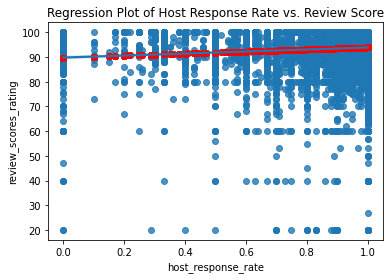

In [ ]:
response_rate_model = LinearRegression().fit(airbnb_df[['host_response_rate']], airbnb_df['review_scores_rating'])
sns.regplot(x=airbnb_df["host_response_rate"], y=airbnb_df["review_scores_rating"])
plt.scatter(airbnb_df['host_response_rate'], response_rate_model.predict(airbnb_df[["host_response_rate"]]), c='red')
plt.title('Regression Plot of Host Response Rate vs. Review Score')
plt.show()

**Explanation for cell below:** The model shows a positive relationship between host response rate and the review score of an airbnb listing. Specifically, we expect that each one unit increase in host response rate corresponds to a 4.087 increase in the review score. This model indicates that when the host response rate is 0, we expect the review score of the property to be 89.787. The sign of the slope matches our expectation, because we expect higher response rate would lead to higher review score. The $r^2$ of the linear regression model for response rate against review score is 0.006, which can be interpreted as 0.6% of the variation in the output variable can be explained by the input variable host response rate.

In [ ]:
response_rate_score = response_rate_model.score(airbnb_df[['host_response_rate']], airbnb_df['review_scores_rating'])
print('host response rate coefficient: {:.3f}'.format(float(response_rate_model.coef_)))
print('host response rate intercept: {:.3f}'.format(response_rate_model.intercept_))
print('r^2 score of the response rate model: {:.3f}'.format(response_rate_score))

host response rate coefficient: 4.087
host response rate intercept: 89.787
r^2 score of the response rate model: 0.006


**Explanation for cell below:** Next, we run a linear regression and generate a regression plot for cancellation policy variable. The regression line in the plot is upward sloping, which indicates there is positive relationship between host response rate and review scores.

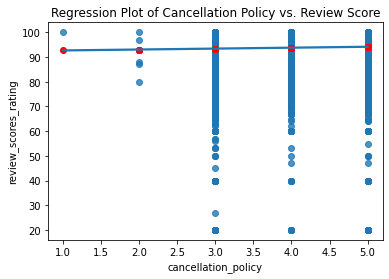

In [ ]:
policy_model = LinearRegression().fit(airbnb_df[['cancellation_policy']], airbnb_df['review_scores_rating'])
sns.regplot(x=airbnb_df["cancellation_policy"], y=airbnb_df["review_scores_rating"])
plt.scatter(airbnb_df['cancellation_policy'], policy_model.predict(airbnb_df[["cancellation_policy"]]), c='red')
plt.title('Regression Plot of Cancellation Policy vs. Review Score')
plt.show()

**Explanation for cell below:** The model shows a positive relationship between cancellation policy and the review score of an airbnb listing. Specifically, we expect that each one unit increase in cancellation policy corresponds to a 0.373 increase in the review score. This model indicates that when the cancellation policy is 1, which represents "super strict 60", we expect the review score of the property to be 92.675 (intercept+coefficient). The sign of the slope matches our expectation, because we expect more flexible cancellation policy would lead to higher review score. The $r^2$ of the linear regression model for response time against review score is 0.001, which can be interpreted as 0.1% of the variation in the output variable can be explained by the variation in the cancellation policy.

In [ ]:
policy_score = policy_model.score(airbnb_df[['cancellation_policy']], airbnb_df['review_scores_rating'])
print('cancellation policy coefficient: {:.3f}'.format(float(policy_model.coef_)))
print('cancellation policy intercept: {:.3f}'.format(policy_model.intercept_))
print('r^2 score of the cancellation policy model: {:.3f}'.format(policy_score))

cancellation policy coefficient: 0.372
cancellation policy intercept: 92.305
r^2 score of the cancellation policy model: 0.001


**Explanation for cell below:** Finally, we run a multi variable regression with all of the host characteristics, we are able to see that there is a positive relationship between host response rate and review scores, a small negative relationship between host response time and review scores, and a small positive relationship between cancellation policy and review score. 

Specifically, we expect that each one unit increase in host response time corresponds to a 0.448 decrease in review score. Each one unit increase in host response rate corresponds to a 5.287 increase in review socre. Each one unit increase in cancellation policy corresponds to a 0.416 increase in review score. 

For host response rate and cancellation policy, the signs of the slope match our expectation, because we expect more flexible cancellation policy and faster response rate would lead to higher review score. However, the sign of the slope for host response time does not match our expectation. 



In [ ]:
def run_regression2(x,train,test,y):
    reg = LinearRegression().fit(train[x],train[y])
    train_predict=reg.predict(train[x])
    test_predict=reg.predict(test[x])
    mse1 = mean_squared_error(train_predict,train[y])
    mse2 = mean_squared_error(test_predict,test[y])
    r2 = reg.score(airbnb_df[x], airbnb_df[y])
    ## add what each variable means in the print
    print(x)        
    print(reg.coef_)
    print(reg.intercept_)
    print(np.sqrt(mse1))
    print(np.sqrt(mse2))
    print(r2)

run_regression2(['host_response_time','host_response_rate','cancellation_policy'],airbnb_train,airbnb_test,'review_scores_rating')


['host_response_time', 'host_response_rate', 'cancellation_policy']
[-0.44828109  5.28732087  0.41647156]
88.62420531274437
7.432498808356496
7.425110905847813
0.010180971231468217


### Model

Based on our previous analysis, we see that out of the property characteristics, price has the largest effect on review scores and out of the host characteristics response rate has the largest impact on review scores. Subsequently, we decided to create an OLS regression to evaluate the significance and test our hypotheses of the relationship between property characteristics and review scores and also host characteristics and review scores.



In [ ]:
import statsmodels.api as sm

#### Property Characteristics (Rental Price and Review Score)

In [ ]:
X=airbnb_df['price']
y=airbnb_df['review_scores_rating']

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                                  OLS Regression Results                                 
Dep. Variable:     review_scores_rating   R-squared (uncentered):                   0.406
Model:                              OLS   Adj. R-squared (uncentered):              0.406
Method:                   Least Squares   F-statistic:                          1.817e+04
Date:                  Thu, 08 Dec 2022   Prob (F-statistic):                        0.00
Time:                          22:28:55   Log-Likelihood:                     -1.5176e+05
No. Observations:                 26617   AIC:                                  3.035e+05
Df Residuals:                     26616   BIC:                                  3.035e+05
Df Model:                             1                                                  
Covariance Type:              nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In this the model the r2 score demonstrates there is not a strong correlation between price and review score and price has a small positive impact on review scores which we also found earlier in our multi variable analysis.

#### Host Characteristics (Host Response Rate and Review Score)

In [ ]:
X=airbnb_df['host_response_rate']
y=airbnb_df['review_scores_rating']

model = sm.OLS(y,X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                                  OLS Regression Results                                 
Dep. Variable:     review_scores_rating   R-squared (uncentered):                   0.972
Model:                              OLS   Adj. R-squared (uncentered):              0.972
Method:                   Least Squares   F-statistic:                          9.296e+05
Date:                  Thu, 08 Dec 2022   Prob (F-statistic):                        0.00
Time:                          22:30:58   Log-Likelihood:                     -1.1102e+05
No. Observations:                 26617   AIC:                                  2.220e+05
Df Residuals:                     26616   BIC:                                  2.220e+05
Df Model:                             1                                                  
Covariance Type:              nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

The model shows there is a strong correlation between the host response rate and the reviews. The model also shows that the host response rate has a significant impact at a 95% confidence level on the reviews since our p value is less than 0.05.

## Interpretations and Conclusion

### Property Characteristics and Review Score


After analyzing how location affects review scores, we concluded that listings further away from the city center do not significantly differ in their rating from those close to the city center. There is a slight negative relationship meaning that listings far away (specifically further east) tend to have lower review score ratings. This is exemplified by calculating an r^2 score of a distance model from the city center, which equaled only 0.001.  This shows that the results are almost negligible correlation. This makes intuitive sense since review ratings depend more on whether the listing is where it says it is rather than the actual location itself.

As for the property type, we see that each of the property types has similar median review scores. However, there does seem to be a significant relationship where certain property types, such as lofts and condos, have higher ratings, averaging around 95/100 review score, compared to a dorm or cabin that averages around a 90/100 review score. This also makes intuitive sense since we imagine it would be harder to have a better experience in a dorm or shared cabin for a guest when compared to a luxury condo or loft.

Analyzing the impact of the price on the review rating, we do not see a significant relationship. It has a very low correlation, as a one-dollar increase in price only corresponds to a .0026 percentage increase in review score. The relationship is also positive which makes sense because expensive airbnbs are more likely priced higher because they are of better quality- hence leading to a higher review score. However, this impact is not significant so we fail to reject our null hypothesis that property characteristics do not impact review score ratings.

### Host Characteristics and Review Scores

After analyzing how host response time affects review scores, we found a very low correlation. This makes sense since people rate Airbnb after staying at the property. Therefore, it is likely that the response time does not significantly impact the rating of the Airbnb but rather how often it is booked. 

Next, there was a strong positive relationship between the host response rate and the review score of an Airbnb listing. A one-unit increase in host response time corresponds to a 4.087 increase in the review score based on our linear regression model. This matches our expectations because we expect hosts with a high response rate to be better hosts. For example, if there is any issue when the guests are staying, they can reach the hosts easily, increasing the overall experience. Subsequently, we can conclude that the response rate positively impacts review scores.

Analyzing the impact of cancellation policy on review scores, we find a positive relationship which we expect since a more flexible host also corresponds to a better overall experience. Our results demonstrated that a one-unit increase in cancellation policy corresponds to a 0.373 increase in the review score. 

In conclusion, host characteristics have a substantial impact on the review scores of an Airbnb and we reject our null hypothesis that states it doesn't. 


## Conclusion

Our research concluded that host characteristics impact a listing's review score more than property characteristics; however, they do so only slightly. This is because we found that the definition of a good host is more straightforward than the definition of a good property. The definition of a "good property" is far more subjective than the definition of a "good host". Many guests have different preferences and ideas for what makes a favorable property. By contrast, many host characteristics are essential to the reservation process. 

Our data analysis demonstrated that if guests cannot get a response from a host quickly enough, they will consider this when leaving a review or may even book an entirely different property instead. Simultaneously, there are far too many property characteristics to consider, which fail to demonstrate significant and similar findings and fail to establish a relationship with review scores. Many guests have different ideas of what makes a highly-rated rental property. Some guests prefer a better location, a better price, or a specific property type, such as a house, over an apartment. The term "property characteristics" is too broad and subjective compared to "host characteristics". In contrast, all guests have solidified ideas of what makes a good host: a quick response rate and a strong, visually appealing host profile on Airbnb. 

Therefore, it is evident that, given the data analysis conducted, host characteristics are slightly more impactful to a listing's review.

## Data limitations

One of the major limitations of this study is that there are a lot of fake ratings. For example, hosts will sometimes rate their own property or ask others to do it to increase the percentage of their review score. This will lead to bias in the model since some of the Airbnb's results are not an accurate representation of what people think about the listing. This leads to some bias in our data of the success of some properties being exaggerated. 

Secondly, a large number of properties had very few reviews or none at all. We removed the properties without a review score from our data when we cleaned it but this means we did not account for several of the listings available in NYC and we still have the properties with few ratings. Also, it is proven that people are more likely to leave a review if it's a negative experience.This means that the results are likely skewed where properties with lower ratings are more likely to have been in our sample since we removed the properties with no ratings.

Additionally, to draw our conclusions, we have to make assumptions about what characteristics make a good host and narrow down which ones really differentiate a property. We chose response rate, cancellation policy, and response time to be the ones that determine a good host but there may be missing characteristics that impact the success of a host. Similarly, we narrowed it down to location, property type, and price for the property attributes; however, many other things could be impacting the Airbnb listing which are not accounted for.

We also used host response rate as our main variable to determine whether host characteristics impact review scores. We did this because our linear regression showed this had the largest impact on review score ratings. However, this induces bias in our findings because we made a large assumption that hosts who respond more are better hosts when they're many other qualititative factors which really determine what makes a good host. 

## Source Code
Link to GitHub Repository https://github.com/aliyasweeney/info2950-project/tree/main/2950%20phase%20v

## Acknowledgements

To better understand our research, we found it beneficial to first analyze our research question and data at the surface level. We found exploring non-data-related resources involving our hypothesis exceptionally helpful. For example, we first familiarized ourselves with the website design of Airbnb to understand the first point of contact for consumers and solidify an understanding of our data elements. We wanted to see how property and host characteristics were displayed on the Airbnb website and if that would significantly impact our research. We carefully analyzed numerous property listings on Airbnb’s website before delving into the data set. We acknowledged that host and property characteristics are equally dispersed on the property listing, so there was no need for concern. Therefore, Airbnb’s website was a useful tool for the first introductory research stage. 

During the data analysis process, when we encountered roadblocks, we found asking questions through our class’s Ed Discussion to be the most helpful. Secondly, we found asking questions on Stack Overflow beneficial, given its popularity and simplicity. If we had difficulty regarding concepts, we turned to YouTube videos posted from reputable channels to be helpful. This is because it visually represented the question at hand, which was highly beneficial. 

##  Appendix - Data collection and cleaning

We store a raw dataset as a DataFrame and examine its shape and size.

In [ ]:
raw_data_df = pd.read_csv('New_York.csv')

print(raw_data_df.shape)
print(raw_data_df.size)
raw_data_df.head()

(44317, 31)
1373827


,id,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,...,maximum_nights,calendar_updated,availability_30,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,reviews_per_month
0,18461891,NaN,NaN,f,t,Ditmars Steinway,40.774142,-73.916246,t,Apartment,...,6,5 months ago,0,0,NaN,f,f,strict,f,NaN
1,20702398,within an hour,100%,f,t,City Island,40.849191,-73.786509,f,House,...,21,2 weeks ago,19,2,100.0,f,f,moderate,f,2.00
2,6627449,within an hour,100%,f,t,City Island,40.849775,-73.786609,t,Apartment,...,21,2 weeks ago,28,21,95.0,f,f,strict,f,0.77
3,19949243,within a few hours,100%,f,t,City Island,40.848838,-73.782276,f,Boat,...,1125,6 days ago,30,0,NaN,t,f,strict,f,NaN
4,1886820,NaN,NaN,f,t,City Island,40.841144,-73.783052,t,House,...,90,16 months ago,30,0,NaN,f,f,strict,f,NaN


The dataset is downloaded from Kaggle 
(URl: https://www.kaggle.com/datasets/ivanovskia1/nyc-airbnb-rental-data-october-2017/versions/1?resource=download). 

We use NYC Airbnb Rental data in October 2017 as our sample to anaylze whether property characteristics or host characterisitics play a more important role in the review score of an Airbnb listing in NYC. The raw dataframe has 44317 rows and 31 columns. The size of the dataframe is 1373827, which is too big and contains some irrelevant information, so we need to clean it first. 

In [ ]:
raw_data_df.isnull().sum()

id                                   0
host_response_time               13679
host_response_rate               13679
host_is_superhost                  232
host_has_profile_pic               232
neighbourhood_cleansed               0
latitude                             0
longitude                            0
is_location_exact                    0
property_type                        0
room_type                            0
accommodates                         0
bathrooms                          144
bedrooms                            73
beds                                91
bed_type                             0
amenities                            0
square_feet                      43768
price                                0
guests_included                      0
minimum_nights                       0
maximum_nights                       0
calendar_updated                     0
availability_30                      0
number_of_reviews                    0
review_scores_rating     

Our research question is centered around the property characteristics and host characteristics of Airbnb rentals, so our first step in cleaning the data was to drop columns that we deemed irrelevant, such as id and calendar updates. Other characteristics like longitude and latitude were too specific for a general audience, as opposed to the general location characteristic. Square footage of the listing would be a beneficial characteristic to include, but after checking the null value, we found that 43768 of the listings do not contain this information, which is 98.7% of our total listings, so we decided to drop it. Finally, given our research question, we chose to include location, property type, and price for property characteristics, and use host response time, host response rate, and cancellation policy for the primary host characteristics. We also need to use review scores rating as our output variable. Furthermore, all other columns will be removed, as we deemed them irrelevant to our research question. 

In [ ]:
%sql data_df << SELECT neighbourhood_cleansed AS location, longitude, latitude, property_type, price, host_response_time, host_response_rate, cancellation_policy, review_scores_rating FROM raw_data_df
print(data_df.shape)
print(data_df.size)
data_df.head()

Returning data to local variable data_df
(44317, 9)
398853


,location,longitude,latitude,property_type,price,host_response_time,host_response_rate,cancellation_policy,review_scores_rating
0,Ditmars Steinway,-73.916246,40.774142,Apartment,110,None,None,strict,NaN
1,City Island,-73.786509,40.849191,House,50,within an hour,100%,moderate,100.0
2,City Island,-73.786609,40.849775,Apartment,125,within an hour,100%,strict,95.0
3,City Island,-73.782276,40.848838,Boat,100,within a few hours,100%,strict,NaN
4,City Island,-73.783052,40.841144,House,300,None,None,strict,NaN


We need to further clean the dataset as there are some NaN values for host response time, host response rate and review score rating. We decide to remove rows that contain missing data. We choose to remove incomplete data instead of filling in numbers for missing data because about 31% of the rows do not contain a value for host response time and host response rate, and about 22% of the rows do not contain a value for the review score. We think if we simply fill the missing value with zeros, it will create a strong bias during our sample analysis. Our raw dataset is very large, so removing the raws can still lead to a reliable and consistent dataset.

In [ ]:
%sql airbnb_df << SELECT* FROM data_df WHERE review_scores_rating is not null and host_response_time is not null and host_response_rate is not null
print(airbnb_df.shape)
print(airbnb_df.size)

Returning data to local variable airbnb_df
(26620, 9)
239580


Multi-input linear regression assumes that all the input values are numbers, but the values for several attributes are strings. We will use the map() function to replace these string values to numeric values.

First, we assign numeric values to host_response_time category and let larger numbers associate with faster response time. 

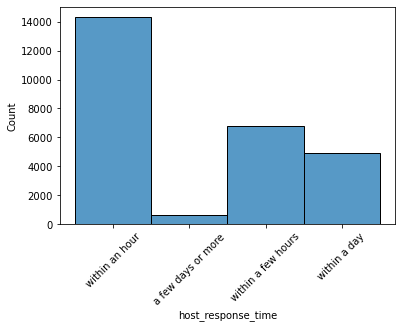

In [ ]:
sns.histplot(data=airbnb_df, x='host_response_time')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
#Larger numbers are associated with faster response time
response_time_map = {"a few days or more": 1, "within a day": 2, "within a few hours": 3, "within an hour": 4}
airbnb_df['host_response_time'] = airbnb_df['host_response_time'].map(response_time_map)

Next, we we assign numeric values to cancellation_policy category and let larger numbers associate with more flexible policy. 

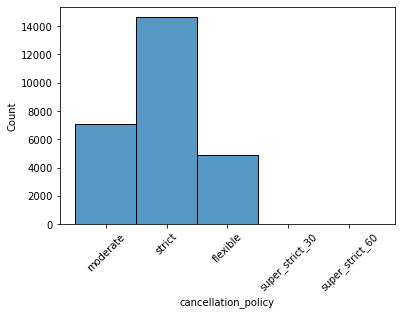

In [ ]:
sns.histplot(data=airbnb_df, x='cancellation_policy')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
#Larger numbers are associated with more flexible policy
cancellation_map = {"super_strict_60": 1, "super_strict_30": 2, "strict": 3, "moderate": 4, "flexible": 5}
airbnb_df['cancellation_policy'] = airbnb_df['cancellation_policy'].map(cancellation_map)

In [ ]:
print(airbnb_df['host_response_rate'].dtype)

object


We find that host_response_rate are objects, so we need to change its type to float to ease the data analysis process. 

In [ ]:
airbnb_df['host_response_rate'] = airbnb_df['host_response_rate'].astype('str') 
airbnb_df['host_response_rate'] = airbnb_df['host_response_rate'].str.rstrip('%').astype('float')/100
print(airbnb_df['host_response_rate'].dtype)

float64


We find there are 211 unique locations such as City island, Allerton, and Ditmars Steinway in the dataset. 211 locations is very hard to analyze and interpret, so we want to change it to neighbourhood group (Manhattan, Brooklyn, Queens, etc.)

In [ ]:
uniquelocation = airbnb_df['location'].unique()
print("First 20 unique locations: ")
print(uniquelocation[:20])
num_unique = len(uniquelocation)
print("Number of unique locations: " + str(num_unique))

First 20 unique locations: 
['City Island' 'Allerton' 'Ditmars Steinway' 'Soundview' 'Ozone Park'
 'Fordham' 'Whitestone' 'Arden Heights' 'Arrochar' 'Arverne' 'Astoria'
 'Bath Beach' 'Bayside' 'Battery Park City' 'Bay Ridge' 'Bay Terrace'
 'Baychester' 'Bayswater' 'Bedford-Stuyvesant' 'Belle Harbor']
Number of unique locations: 211


We use another dataset that has neighbourhood group and precise neighbourhood location. We pass this dataset as a dictionary and map the dictionary to our location variable.

In [ ]:
location_df = pd.read_csv('location.csv')
%sql location_df1 << SELECT neighbourhood, neighbourhood_group FROM location_df
location_df1.head()
location_df1.set_index("neighbourhood", inplace=True)
location_df1.head()

Returning data to local variable location_df1


,neighbourhood_group
neighbourhood,
Kensington,Brooklyn
Midtown,Manhattan
Harlem,Manhattan
Clinton Hill,Brooklyn
East Harlem,Manhattan


In [ ]:
location = location_df1.to_dict('dict')
#print(location_map)
location_map = location['neighbourhood_group']

In [ ]:
airbnb_df['location'].astype(str)
airbnb_df['location'] = airbnb_df['location'].map(location_map)
airbnb_df.head()

,location,longitude,latitude,property_type,price,host_response_time,host_response_rate,cancellation_policy,review_scores_rating
0,Bronx,-73.786509,40.849191,House,50,4,0.01,4,100.0
1,Bronx,-73.786609,40.849775,Apartment,125,4,0.01,3,95.0
2,Bronx,-73.789328,40.850024,House,69,4,0.01,4,97.0
3,Bronx,-73.789304,40.851980,Apartment,150,4,0.01,5,100.0
4,Bronx,-73.788680,40.852054,House,101,4,0.01,4,100.0


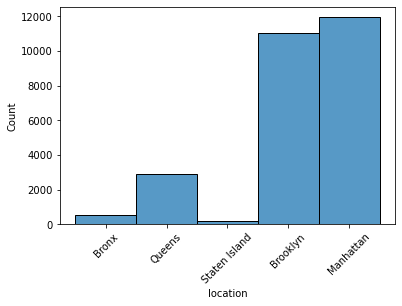

In [ ]:
sns.histplot(data=airbnb_df, x='location')
plt.xticks(rotation = 45)
plt.show()

There are three NaN value for location that we need to remove. 

In [ ]:
%sql airbnb_df << SELECT* FROM airbnb_df WHERE location is not null

Returning data to local variable airbnb_df


In [ ]:
airbnb_df.isnull().sum()

location                0
longitude               0
latitude                0
property_type           0
price                   0
host_response_time      0
host_response_rate      0
cancellation_policy     0
review_scores_rating    0
dtype: int64

In [ ]:
print(airbnb_df.shape)
print(airbnb_df.size)

(26617, 9)
239553


At this point, our data is in good quality. The clean dataframe has 26617 rows and 9 columns. The size of the dataframe is 239,553 , which is a large, representative dataset for our analysis. We are ready to explore the dataset further. The cleaned data is exported as cleaned_airbnb_data.csv.

In [ ]:
airbnb_df.to_csv('cleaned_airbnb_data.csv')